# Big Data - Lab Project 1
This lab project covers the material from Lectures 1-3. Please make yourself familiar with the lecture content before proceeding. We will be using the [**Pokemon with stats**](https://www.kaggle.com/abcsds/pokemon) dataset courtesy of Alberto Barradas on Kaggle.

**<u>How to complete</u>**:
- For each exercise, read the objective and hint, and then fill the cells containing **TODO**. These will usually be code cells requiring you to write Python code. If we ask you to explain something in plaintext, these may also be Markdown cells.
- Do not modify any cells except for the ones containing **TODO**.
- Do not add or delete any cells from the notebook. If you add any cells during your work, please remove them before submitting.
- Allowed libraries are imported below. No additional libraries may be used for this lab project.
- **Run all cells before submitting. You will only get marks for code that has been run, and has not produced any errors.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Dataset Import and Exploration (3 marks)

### Exercise 1.1 (1 mark)
Use pandas to read in the dataset `pokemon.csv` as a pandas `DataFrame` named `df_pokemon`.

Hint: Look at the function [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [2]:
# TODO: Add your solution (Python code) in this cell.
import pandas as pd
import numpy as np
# Read the CSV file into a DataFrame
df_pokemon = pd.read_csv('pokemon.csv')

### Exercise 1.2 (1 mark)
- Use the `print` command to display the number of rows and columns in `df_pokemon`, formatted as a gramatically correct sentence.
- Get an idea of the dataset content by printing the first four rows to the console.

Hint: Look at Python string formatting and the function [`pd.DataFrame.head`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html).

In [3]:
# TODO: Add your solution (Python code) in this cell.
# use count
count_row = len(df_pokemon.index)
count_col = len(df_pokemon.columns)
print("Number of rows of df_pokemon: ", count_row)
print("Number of columns of df_pokemon: ", count_col)
#print first four rows
df_pokemon.head(4)

Number of rows of df_pokemon:  800
Number of columns of df_pokemon:  13


,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,NotLegendary
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,NotLegendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,NotLegendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,NotLegendary


### Exercise 1.3 (1 mark)
- Use pandas to test if there are any `null` values in `df_pokemon`. Print the result to the console as a boolean.
- Create a new version `df_pokemon_co` of `df_pokemon` which excludes all observations affected by missing data. Use the `print` command to display the number of complete observations to the console, formatted as a gramatically correct sentence.

Hint: Look at the functions [`pd.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) and [`pd.DataFrame.any`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html).

In [4]:
# TODO: Add your solution (Python code) in this cell.
null_check = df_pokemon.isnull().any().any()

#print result of null check
print("Null values in df_pokemon:", null_check)

#create new dataframe without missing null value
df_pokemon_co = df_pokemon.dropna()
num_complete_observations = df_pokemon_co.shape[0]
print(f"Number of complete observations in df_pokemon_co: {num_complete_observations} observation{'s' if num_complete_observations != 1 else ''}.")


Null values in df_pokemon: True
Number of complete observations in df_pokemon_co: 414 observations.


## Exercise 2: Basic Statistics (3 marks)

### Exercise 2.1 (1 mark)
- Using `df_pokemon_co`, calculate the mean `HP` for legendary and not-legendary pokemon. Store these two means into separate variables.
- Use the `print` command to display the difference in mean `HP` between legendary and not-legendary pokemon to the console in a grammatically correct sentence. The difference should be rounded to two digits.

Hint: Look up how to use rounding in Python string formatting, and at the function [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) or [`pd.DataFrame.mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html).

In [5]:
# TODO: Add your solution (Python code) in this cell.

# Read the CSV file into a DataFrame
df_pokemon = pd.read_csv('pokemon.csv')

# Create a new DataFrame df_pokemon_co excluding rows with missing data
df_pokemon_co = df_pokemon.dropna()

# Calculate the mean HP for legendary and not-legendary Pokemon
mean_hp_legendary = df_pokemon_co[df_pokemon_co['Legendary'] == True]['HP'].mean()
mean_hp_not_legendary = df_pokemon_co[df_pokemon_co['Legendary'] == False]['HP'].mean()

# Calculate the difference in mean HP between legendary and not-legendary Pokemon
mean_hp_difference = mean_hp_legendary - mean_hp_not_legendary

# Print the difference in mean HP in a grammatically correct sentence
print(f"The difference in mean HP between legendary and not-legendary Pokémon is {mean_hp_difference:.2f} points.")

The difference in mean HP between legendary and not-legendary Pokémon is nan points.


### Exercise 2.2 (1 mark)
Calculate the variance and the standard deviation of the variable `Attack` for pokemon of `Generation` 1, based on `df_pokemon_co`. Use the `print` command to display the results on the console, rounded to two decimals.

Hint: Look up how to use rounding in Python string formatting, and at the function [`np.var`](https://numpy.org/doc/stable/reference/generated/numpy.var.html) and [`np.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html) or [`pd.DataFrame.var`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html) and [`pd.DataFrame.std`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html).

In [6]:
# TODO: Add your solution (Python code) in this cell.

# Read the CSV file into a DataFrame
df_pokemon = pd.read_csv('pokemon.csv')

# Create a new DataFrame df_pokemon_co excluding rows with missing data
df_pokemon_co = df_pokemon.dropna()

# Filter Pokémon of Generation 1
gen1_pokemon = df_pokemon_co[df_pokemon_co['Generation'] == 1]

# Calculate the variance and standard deviation of Attack for Generation 1 Pokémon
attack_variance = np.var(gen1_pokemon['Attack'], ddof=0)  # Setting ddof=0 for population variance
attack_std_dev = np.std(gen1_pokemon['Attack'], ddof=0)   # Setting ddof=0 for population standard deviation

# Print the results with two decimal places
print("Variance of Attack for Generation 1 Pokémon: {:.2f}".format(attack_variance))
print("Standard Deviation of Attack for Generation 1 Pokémon: {:.2f}".format(attack_std_dev))

Variance of Attack for Generation 1 Pokémon: 1024.83
Standard Deviation of Attack for Generation 1 Pokémon: 32.01


### Exercise 2.3 (1 mark)
- Calculate the standard error (of the mean) for the variable `Attack` for pokemon of `Generation` 1, based on `df_pokemon_co`, and print it to the console.
- In your own words, describe the difference between a standard error (of the mean) and a standard deviation.

Hint: You can use the formulation of the standard error as a lambda function from Lecture 2.

In [7]:
# TODO: Add your solution (Python code) in this cell.
# Read the CSV file into a DataFrame
df_pokemon = pd.read_csv('pokemon.csv')

# Create a new DataFrame df_pokemon_co excluding rows with missing data
df_pokemon_co = df_pokemon.dropna()

# Filter Pokémon of Generation 1
gen1_pokemon = df_pokemon_co[df_pokemon_co['Generation'] == 1]

# Calculate the standard error of the mean for Attack for Generation 1 Pokémon
attack_std_dev = np.std(gen1_pokemon['Attack'], ddof=0)  # Population standard deviation
num_observations = len(gen1_pokemon)
standard_error = attack_std_dev / np.sqrt(num_observations)

# Print the standard error to the console
print("Standard Error of the Mean for Attack of Generation 1 Pokémon:", standard_error)

Standard Error of the Mean for Attack of Generation 1 Pokémon: 3.624754133644801


#In my opinion: SD describes the variation of an individual in a population, while SE describes the variation of the average number selected from the population to the sample.

## Exercise 3: Visualisation (4 marks)

### Exercise 3.1 (2 marks)
Use `matplotlib` to create a boxplot that shows the `Total` attribute for pokemons by their `Type1` categorisation. You should use `df_pokemon_co` for this, and furthermore only consider pokemon whose `Type1` is either *Grass*, *Fire*, *Normal*, *Water*, or *Flying*. The `Total` attribute should be shown on the x axis. Please use an appropriate title and axis labels.

Hint: Look at [`plt.boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

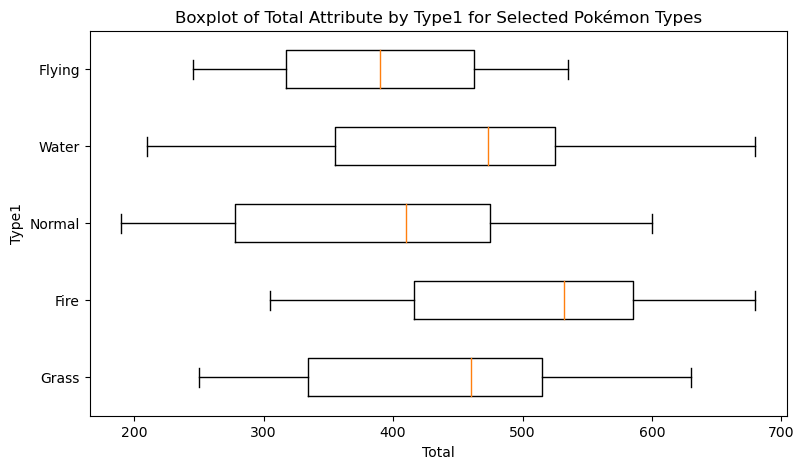

In [8]:
# TODO: Add your solution (Python code) in this cell.

# Read the CSV file into a DataFrame
df_pokemon = pd.read_csv('pokemon.csv')

# Create a new DataFrame df_pokemon_co excluding rows with missing data
df_pokemon_co = df_pokemon.dropna()

# List of selected types
selected_types = ['Grass', 'Fire', 'Normal', 'Water', 'Flying']

# Filter Pokémon based on selected Type1 categories
filtered_pokemon = df_pokemon_co[df_pokemon_co['Type1'].isin(selected_types)]

# Create the boxplot
plt.figure(figsize=(9, 5)) 
plt.boxplot(
    [filtered_pokemon[filtered_pokemon['Type1'] == t]['Total'] for t in selected_types],
    labels=selected_types, vert = False
)

# Set labels and title
plt.ylabel('Type1')
plt.xlabel('Total')
plt.title('Boxplot of Total Attribute by Type1 for Selected Pokémon Types')

# Show the plot
plt.show()

### Exercise 3.2 (2 marks)
Use `matplotlib` to create a scatterplot of the `Attack` (on x Axis) and `Defense` (on y Axis) attributes for pokemons in `df_pokemon_co`. Distinguish between `Legendary` (in color *Red*) and `NotLegendary` (in color *Blue*) pokemon. Please use an appropriate title and axis labels, as well as a legend.

Hint: Look at [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

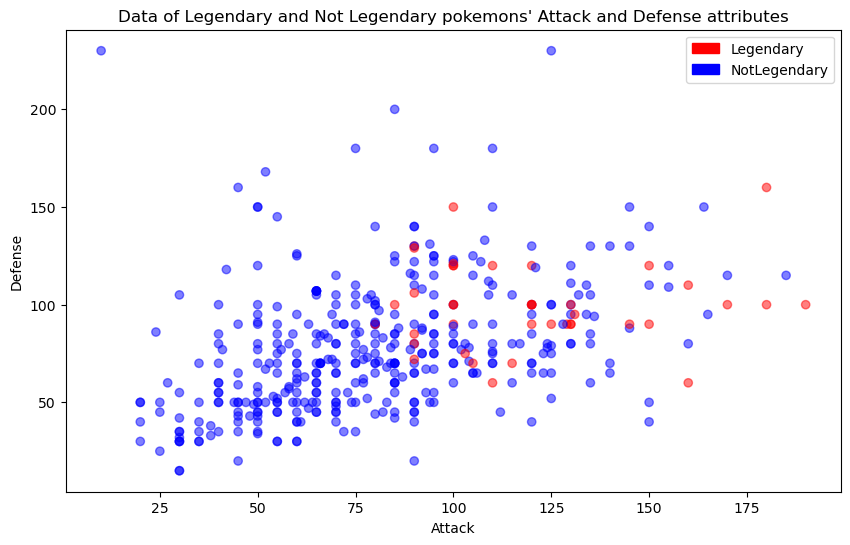

In [9]:
# TODO: Add your solution (Python code) in this cell.

import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))
#create dataframe df_pokemon_co for Attack & Defense
x = df_pokemon_co['Attack']
y = df_pokemon_co['Defense']

#Create legend mapping for legendary and notlegendary type
legend_colors = {'Legendary':'red', 'NotLegendary':'blue'}

#Create graph 
plt.scatter(x, y, c=df_pokemon_co['Legendary'].map(legend_colors), alpha=0.5)

#Create label and title
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title("Data of Legendary and Not Legendary pokemons' Attack and Defense attributes")
#Create manual legend
red_patch = mpatches.Patch(color='red', label='Legendary')
blue_patch = mpatches.Patch(color='blue', label='NotLegendary')
plt.legend(handles=[red_patch, blue_patch])